<a href="https://colab.research.google.com/github/Steve-siddu/Machine-Learning/blob/main/EDA_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

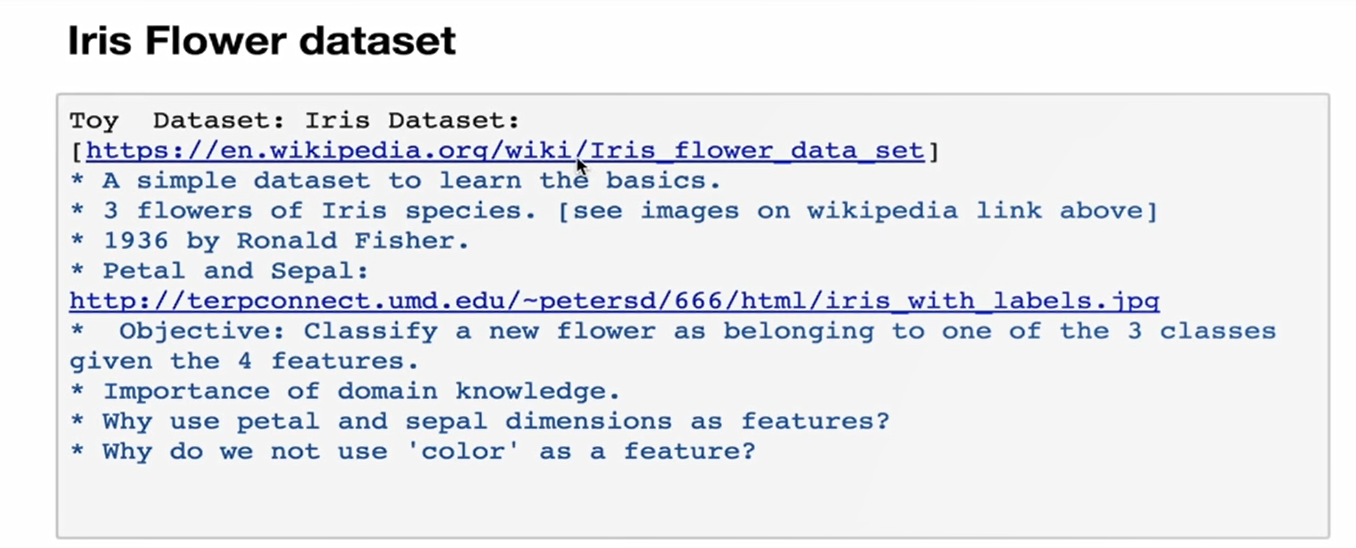

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/IRIS.csv')

In [5]:
# what is the shape?
df.shape

(150, 5)

In [6]:
 # what are the colums?
 df.columns 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
#  How the data pints/cells/rows data looks like?
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Basic details of dataset?
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# What is the count of each output value
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### Plotting the data for the data analysis

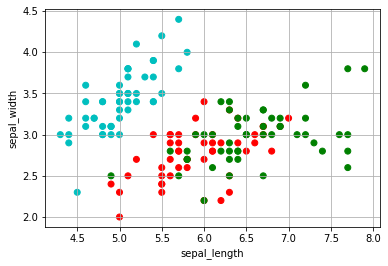

In [10]:
colors = ['c' if l=='Iris-setosa'  else 'r' if  l=='Iris-versicolor' else 'g' for l in df['species']]
plt.scatter(df['sepal_length'], df['sepal_width'], c=colors)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.grid()


Plotting the same with seaborn

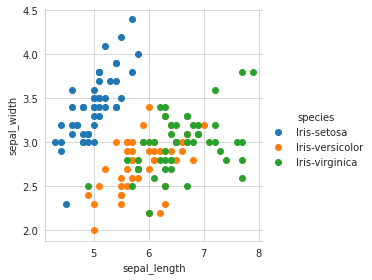

In [11]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='species', height=4) \
  .map(plt.scatter, 'sepal_length', 'sepal_width') \
  .add_legend();
plt.show()

Grou by Species data

In [12]:
group_species = df.groupby('species')
group_species
# for gs in group_species:
#   print(gs)
group_species[['sepal_length', 'sepal_width']].describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width                                                
                      count   mean       std  min    25%  50%    75%  max  
species                                                                    
Iris-setosa            50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4  
Iris-versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4  
Iris-virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

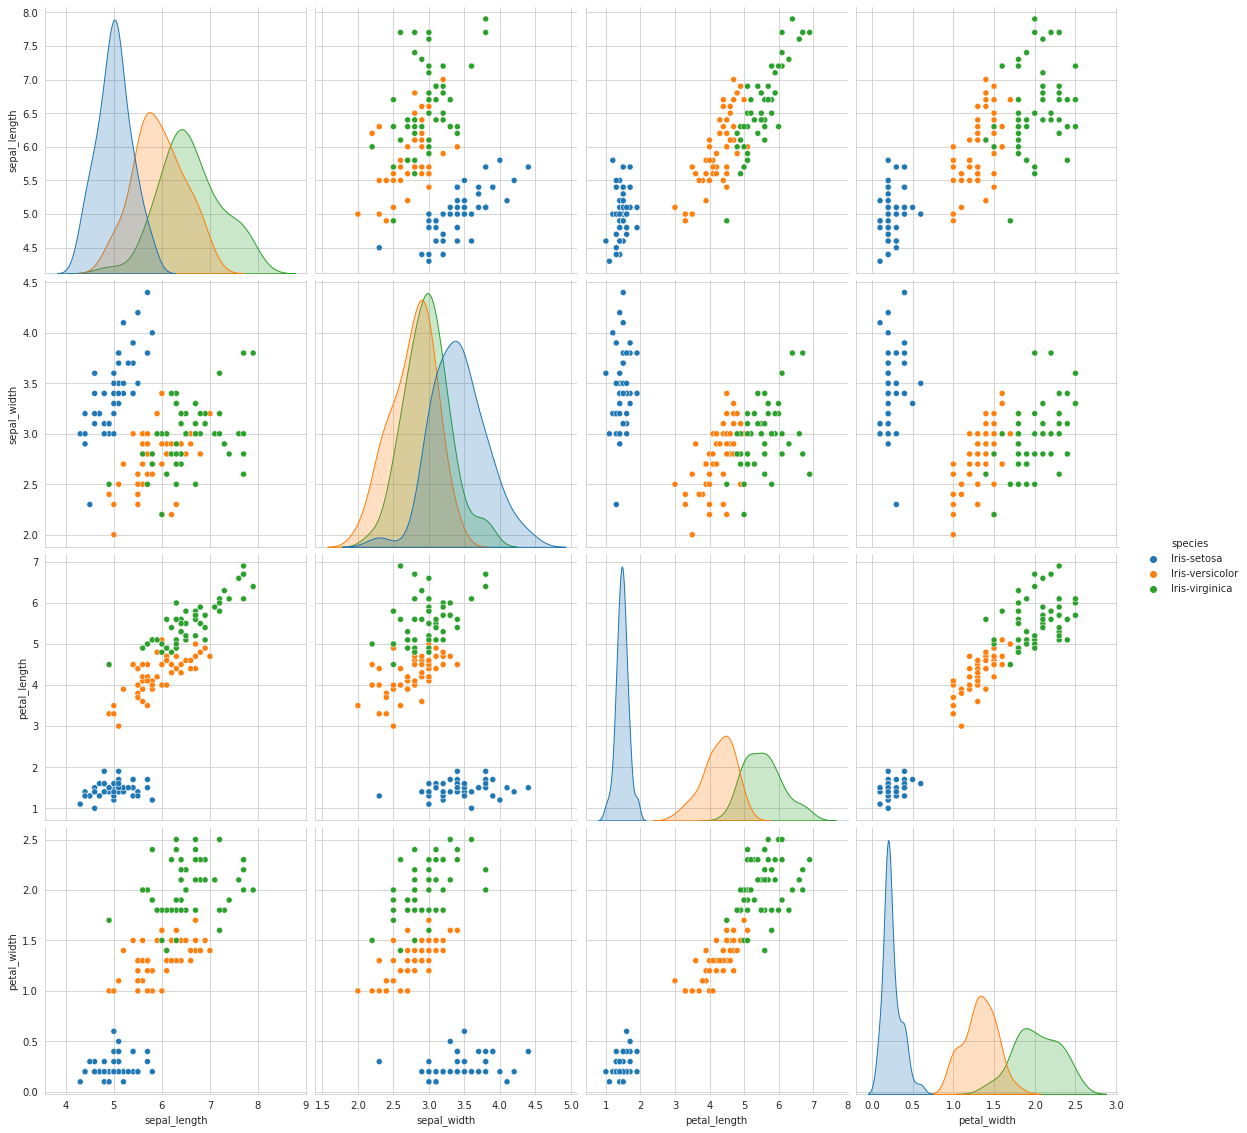

In [13]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='species', height=4)
plt.show()

### Disadvantages of Pairplots
1. Very good for EDA when number of feature/independent variables are less
2. It is not useful in case of high number of features, because total graphs generated/needs to be analysed in pairplots is N C 2, which will very large in case of large N. 

1 Dimentional Scatter Plots
1. plotting a graph using 1 feature
2. in more dense plots, this is not much helpful in understanding the data

Example:
1. 1 dimentional scatter plot using feature petal_length for each ouput class

(50, 5)
(50, 5)
(50, 5)


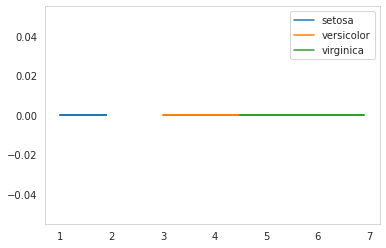

In [14]:
setosa = df.loc[df['species']=='Iris-setosa']
print(setosa.shape)
versicolor = df.loc[df['species']=='Iris-versicolor']
print(versicolor.shape)
virginica = df.loc[df['species']=='Iris-virginica']
print(virginica.shape)


plt.plot(setosa['petal_length'], np.zeros_like(setosa['petal_length']), label='setosa')
plt.plot(versicolor['petal_length'], np.zeros_like(versicolor['petal_length']), label='versicolor')
plt.plot(virginica['petal_length'], np.zeros_like(virginica['petal_length']), label='virginica')
plt.grid()
plt.legend()
plt.show()

Histogram plots ( Density plot )
1. It is a version of 1-dimentional plot
2. It is an advanced type of 1-d plot, where frequencies of each x point is visible. Which was hard to see in 1-D plot.

Example:

Histogram plot using feature petal_length for each ouput class

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

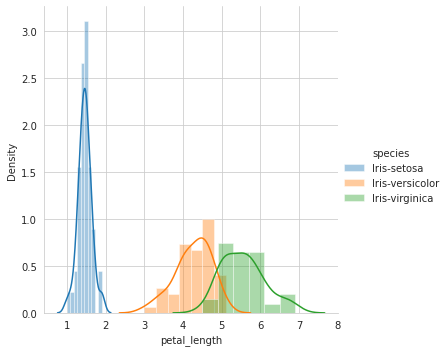

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='species', height=5) \
  .map(sns.distplot, 'petal_length') \
  .add_legend();

plt.show()

PDF(Probability Distribution Function) vs CDF (Cumulative Distribution Function)

Reading PDF & CDF:

1. if PDF of a point A on x-axis is 0.43, it means 43% of x-points are that point A
2. if CDF of a point B on x-axis is 0.67, it means 67% of x-points are less than equals to that point B

Now, Lets calculate and Visulise the PDF and CDF of IRIS dataset

[0.12 0.44 0.78 0.92 1.  ]


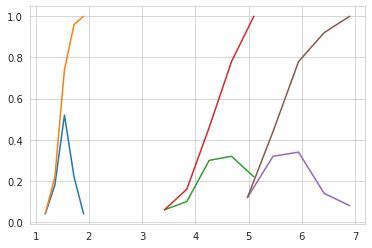

In [16]:
counts, bin_edges_setosa = np.histogram(setosa['petal_length'], bins=5, density=True)
# print(counts, bin_edges)
# print(setosa['petal_length'].value_counts())
# print(sum(counts))

pdf_setosa = counts / sum(counts)
# print(pdf)
# calculating cumulative sums of each pdf
cdf_setosa = np.cumsum(pdf_setosa)

# VERSICOLOR
counts, bin_edges_versicolor = np.histogram(versicolor['petal_length'], bins=5, density=True)
pdf_versicolor = counts / sum(counts)
cdf_versicolor = np.cumsum(pdf_versicolor)

# VIRGINICA
counts, bin_edges_virginica = np.histogram(virginica['petal_length'], bins=5, density=True)
pdf_virginica = counts / sum(counts)
cdf_virginica = np.cumsum(pdf_virginica)

print(cdf_virginica)

# plotting pdf and cdf
plt.plot(bin_edges_setosa[1:], pdf_setosa)
plt.plot(bin_edges_setosa[1:], cdf_setosa)
plt.plot(bin_edges_versicolor[1:], pdf_versicolor)
plt.plot(bin_edges_versicolor[1:], cdf_versicolor)
plt.plot(bin_edges_virginica[1:], pdf_virginica)
plt.plot(bin_edges_virginica[1:], cdf_virginica)

plt.show()

### Quantiles and Percentiles

Median: it is a middle point in a sorted data

Median(in other words): It is a point **A**, Where 50% of data points are less than or equal to that point **A**.

50 Percentile Value: It is a point where 50% of data points are less than or equal to that point.

Therefore, 50% value of a data is same as median of the data.

It goes same for 25 Percentile and 75 Percentile.

25 Percentile Value: It is a point where 25% of data points are less than or equal to that point.

75 Percentile Value: It is a point where 75% of data points are less than or equal to that point.

In [17]:
print("Quantiles")
print(type(setosa))

#calculating 50th percentile
print(np.percentile(setosa['petal_length'], 50))

#calculating 90th percentile
print(np.percentile(setosa['petal_length'], 90))

#percentiles
print(np.percentile(setosa['petal_length'], np.linspace(0, 100, 5)))
print(np.percentile(versicolor['petal_length'], np.arange(0, 100, 25)))
print(np.percentile(virginica['petal_length'], np.arange(0, 100, 25)))

Quantiles
<class 'pandas.core.frame.DataFrame'>
1.5
1.7
[1.    1.4   1.5   1.575 1.9  ]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]


### Mean, Variance, Standard Deviation, Median, Median Absolute Deviation(MAD)

**Mean** : Average of all data pointas in a vector

$\mu = \frac{1}{n}$  $\sum_{i=1}^{n} x_1+x_2+x_3+x_4+...+x_n $

$\mu = \frac{1}{n}$  $\sum_{i=1}^{n} x_i $

**Variance**: Average of squared mean distance

$var = \frac{1}{n} \sum_{i=1}^{n} (x_i-\mu)^2$

**Standard Deviation**: Square root of Average squared mean distance

$σ = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i-\mu)^2}$

**Median**: The middle value in a sorted data

$\mu_{1/2}$

**MAD**: Square root of median of absolute distance

$\text{MAD} = \text{median}(|x_i - \text{median}(x)|)$



In [24]:
#mean of setosa petal length
print(f"Mean : {np.mean(setosa['petal_length'])}")

#Standard Deviation of setosa petal length
print(f"STD: {np.std(setosa['petal_length'])}")

#Medain of setosa petal length
print(f"Median : {np.median(setosa['petal_length'])}")

#50th Percentile of setosa petal length
print(f"50th Percintile value : {np.percentile(setosa['petal_length'], 50)}")

#MAD (Median of absolute difference)
# There is no pre-defined function to calculate MAD in np, we use 'robust' to compute the MAD
print(f"MAD : {robust.mad(setosa['petal_length'])}")

Mean : 1.464
STD: 0.17176728442867112
Median : 1.5
50th Percintile value : 1.5
MAD : 0.14826022185056031


### Box plot

1. It is a best plot to understand the percentile values with very short code
2. It makes the developer understand the IQR(Inter Quantile Range) easily.

It gives information of 25th, 50th, 75th Percentile values in visually understandable way.


coloured region is from 25% percentile to 75% percentile which is also called as IQR.

The lower and upper whiskers calculated as 1.5 * IQR.



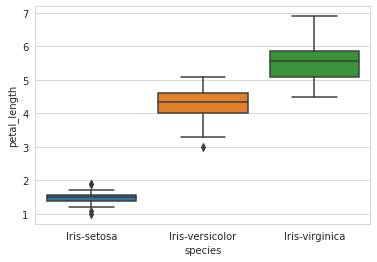

In [25]:
sns.boxplot(x='species', y='petal_length', data=df)

### Plots and Their DisAdvantage



1.   1-D : cannot read the frequency of points in a dense graphs
2.   histogram & PDF: Cannot read percentiles and quantiles of the data
3.   CDF: can read percentiles and quantiles, however not easily inter-pretable
4.   boxplot: Can read percentiles, Quantiles and IQR efficiently. Cannot predict the whisker value. But, most of the data points will be in the range of whiskers.




### Violin Plot

1.    It is the combination of box plot and histogram.
2.    It does box plot horizontally, and spreads frequencies of data points vertically 

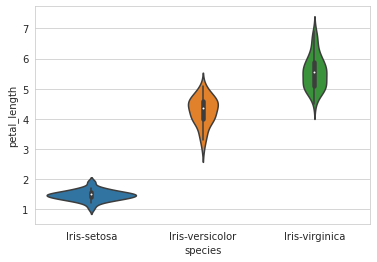

In [28]:
sns.violinplot(x='species', y='petal_length', data=df, size=500)

### Univariate, Bivariate and MultiVariate

1. Univariate : Analysing the data using a single variable

    Eg Plots are: 1-D, histogram, pdf, cdf, boxplots, violin plots
  
2. Bivariate : Analysing the data using two variables

    Eg Plots are: Scatter plots, Pairplots

2. MultiVariate : Analysing the data using multiple variables

    Eg Plots are: 3-D plot

### Contour plot

1. It plots the probability density of 2-featues in 2-dimentions( in 1-D it is done with PDF).
2. this is to undestand probability density of 2 vaiables.